In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# PRZYGOTOWANIE DANYCH
df = sns.load_dataset('titanic')
df_clean = df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean = df_clean.dropna(subset=['embarked'])
df_encoded = pd.get_dummies(df_clean, columns=['sex', 'embarked'], drop_first=True)
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Wymiary X_train: {X_train.shape}")
print(f"Wymiary X_test: {X_test.shape}")

Wymiary X_train: (711, 9)
Wymiary X_test: (178, 9)


  Max Depth  Accuracy  Precision    Recall        F1
0         2  0.797753   0.726027  0.768116  0.746479
1         3  0.820225   0.760563  0.782609  0.771429
2         5  0.820225   0.784615  0.739130  0.761194
3         7  0.814607   0.821429  0.666667  0.736000
4        10  0.797753   0.761905  0.695652  0.727273
5      None  0.741573   0.641975  0.753623  0.693333

Najlepsze max_depth: 3 (Accuracy: 0.8202)
Zbyt mała głębokość (2) powoduje niedouczenie.
Zbyt duża głębokość (10, None) często prowadzi do przeuczenia.
Optimum zazwyczaj leży pośrodku (np. 3-5), gdzie model generalizuje najlepiej.


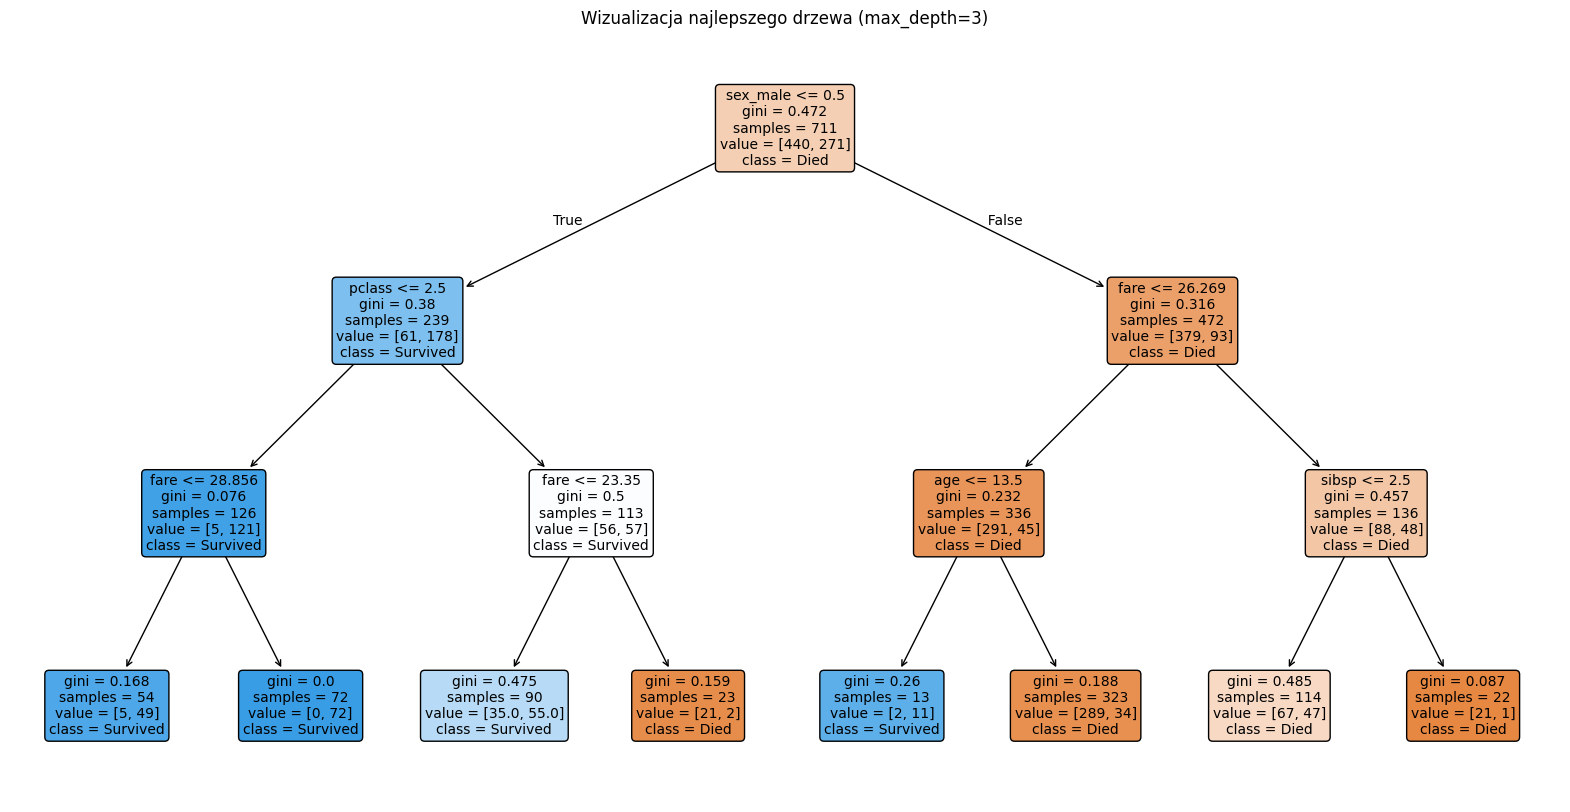

In [ ]:
# DRZEWO DECYZYJNE
depths = [2, 3, 5, 7, 10, None]
results_tree = []
best_acc_tree = 0
best_depth = 0
best_model_tree = None

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_tree.append({
        'Max Depth': str(d),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

    if acc > best_acc_tree:
        best_acc_tree = acc
        best_depth = d
        best_model_tree = clf

results_df = pd.DataFrame(results_tree)
print(results_df)

print(f"\nNajlepsze max_depth: {best_depth} (Accuracy: {best_acc_tree:.4f})")
print("Zbyt mała głębokość (2) powoduje niedouczenie.")
print("Zbyt duża głębokość (10, None) często prowadzi do przeuczenia.")
print("Optimum zazwyczaj leży pośrodku (np. 3-5), gdzie model generalizuje najlepiej.")

plt.figure(figsize=(20, 10))
plot_tree(best_model_tree,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f"Wizualizacja najlepszego drzewa (max_depth={best_depth})")
plt.show()

k=1: Accuracy=0.7247
k=3: Accuracy=0.7753
k=5: Accuracy=0.7978
k=7: Accuracy=0.7640
k=9: Accuracy=0.7640
k=11: Accuracy=0.7865
k=15: Accuracy=0.8090

Optymalne k: 15 (Accuracy: 0.8090)


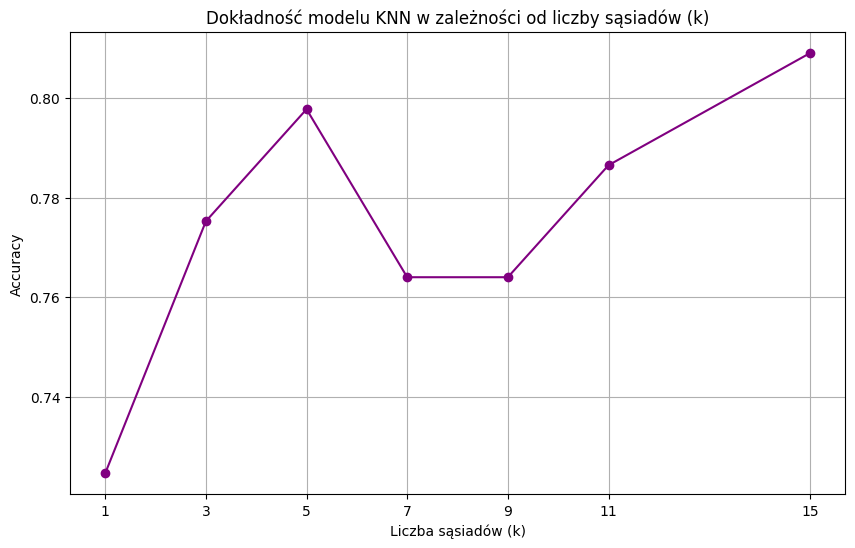

In [ ]:
# KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)

    acc_knn = accuracy_score(y_test, y_pred_knn)
    accuracies_knn.append(acc_knn)
    print(f"k={k}: Accuracy={acc_knn:.4f}")

optimal_k_idx = np.argmax(accuracies_knn)
optimal_k = k_values[optimal_k_idx]
print(f"\nOptymalne k: {optimal_k} (Accuracy: {accuracies_knn[optimal_k_idx]:.4f})")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_knn, marker='o', linestyle='-', color='purple')
plt.title('Dokładność modelu KNN w zależności od liczby sąsiadów (k)')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

1. **Który model działa lepiej?**
Zazwyczaj Drzewo Decyzyjne - lepiej radzi sobie z danymi kategorycznymi (Płeć, Klasa).
Tworzy naturalne reguły (np. "Kobiety przeżywają"), podczas gdy KNN gubi się w obliczaniu odległości między różnymi typami danych.
2. **Wpływ max_depth (Drzewo):**
Zbyt małe (np. 1-2): Niedouczenie - model jest zbyt prosty i nie widzi zależności.
Zbyt duże (np. 10+): Przeuczenie - model zapamiętuje dane treningowe na pamięć (wraz z błędami) i nie radzi sobie na nowych danych.
3. **Wpływ k (KNN):**
Zbyt małe (np. k=1): Przeuczenie/Niestabilność - model jest "nerwowy" – jeden błędny punkt (szum) zmienia wynik w okolicy.
Zbyt duże (np. k=50): Niedouczenie - model zbytnio uśrednia wynik – dominuje klasa większościowa (wszyscy giną).